In [11]:
import matplotlib.pyplot as plt
import matplotlib.collections
import pandas as pd 
import numpy as np
np.set_printoptions(threshold=np.inf)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
from math import sqrt
import csv

### read the data

In [2]:
import pandas as pd 
data = pd.read_csv("clean_white_wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
X = data.drop(["quality"], axis=1)
y = data["quality"] 

## Oversampling the data

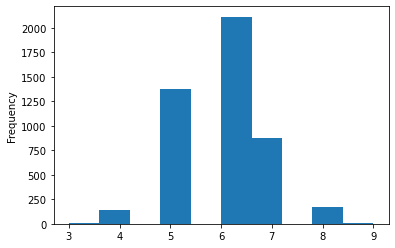

In [5]:
y.plot.hist()

In [6]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='auto', random_state=2, k_neighbors=2)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X, y)
oversampled_data = pd.concat([pd.DataFrame(oversampled_X), pd.DataFrame(oversampled_Y)], axis=1)


In [10]:
oversampled_data.to_csv('oversampled_clean_data_white.csv', index=False)

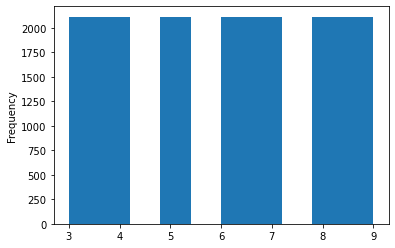

In [7]:
oversampled_data['quality'].plot.hist()

### normalize the data useing z-score

In [ ]:
mean = oversampled_X.mean()
std = oversampled_X.std()
normalized_X = (oversampled_X - mean)/std
normalized_X.head()

### split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, oversampled_Y, test_size=0.18, random_state=42)

In [ ]:
train_normalized_data = X_train.copy()
train_normalized_data['quality'] = y_train

test_normalized_data = X_test.copy()
test_normalized_data['quality'] = y_test
normalized_data = pd.concat([train_normalized_data, test_normalized_data])

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = oversampled_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

# Question 1.a - Regrestion
we'll try out three regresion models and compair them.
1. linear regrestion
2. SVM Regresor
3. neural network regresor

# Linear Regrestion

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print('score = ', reg.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
a=reg.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=reg.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print('test_rmse =', test_rmse)

In [ ]:
reg.coef_

In [ ]:
# polinomial regresion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


p_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

p_reg = p_reg.fit(X_train, y_train)
p_reg.named_steps['linear'].coef_

In [ ]:
from sklearn.metrics import mean_squared_error
print ('score = ', p_reg.score(X_test, y_test))
a = p_reg.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('train_rmse =', train_rmse)
b=  p_reg.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('test_rmse =', test_rmse)

# SVM Regresor

In [ ]:
from sklearn import svm
regr_rbf = svm.SVR(kernel='rbf')
regr_lin = svm.SVR(kernel='linear')
regr_poly =svm.SVR(kernel='poly', degree = 2)
regr_rbf.fit(X_train, y_train)
regr_lin.fit(X_train, y_train)
regr_poly.fit(X_train, y_train)

In [ ]:
print('regr_rbf score = ',regr_rbf.score(X_train,y_train))
a = regr_rbf.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_rbf train_rmse = ',train_rmse)
b=  regr_rbf.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_rbf test_rmse = ', test_rmse, '\n')

print('regr_lin score = ',regr_lin.score(X_train,y_train))
a = regr_lin.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_lin train_rmse = ',train_rmse)
b=  regr_lin.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_lin test_rmse = ', test_rmse,'\n')

print('regr_poly score = ',regr_poly.score(X_train,y_train))
a = regr_poly.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('regr_poly train_rmse = ',train_rmse)
b=  regr_poly.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('regr_poly test_rmse = ', test_rmse)

# Deep Neural Network Regresor 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.layers import Dropout
from keras.models import Model
import tensorflow as tf

In [ ]:
DNN_model = Sequential()
DNN_model.add(Dense(100, input_dim=11, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(128, activation= "selu"))
DNN_model.add(Dropout(0.1))
DNN_model.add(Dense(2, activation= "selu"))
DNN_model.add(Dense(1))

In [ ]:
DNN_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
#history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
history = DNN_model.fit(X_train, y_train, epochs=70, validation_split=0.3)

In [ ]:
print(history.history.keys())

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
a = DNN_model.predict(X_train)
train_rmse = (mean_squared_error(a, y_train)) ** 0.5
print('NN train_rmse = ',train_rmse)
b=  DNN_model.predict(X_test)
test_rmse = (mean_squared_error(b, y_test)) ** 0.5
print('NN test_rmse = ', test_rmse)

# Question 1.b - Clustering
we'll try out three clustering methoods and compair them.
1. DBSCAN
2. K-Means
3. GMM

In [ ]:
from sklearn.cluster import MeanShift
import numpy as np

clustering = MeanShift(bandwidth=3).fit(normalized_X)
clustering.labels_


clustering

In [ ]:
clustering.labels_

In [ ]:
oversampled_data['MeanShift_cluster'] = pd.Series(clustering.labels_, index=oversampled_data.index)

In [ ]:
hist_dictionary = {}
for i in clustering.labels_:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
model.fit(normalized_X)
labels = model.labels_
oversampled_data['Agglomerative_cluster'] = pd.Series(model.labels_, index=oversampled_data.index)

In [ ]:
for i in range(0,7):
    print('min',oversampled_data[oversampled_data.Agglomerative_cluster==i]['quality'].min())
    print('max',oversampled_data[oversampled_data.Agglomerative_cluster==i]['quality'].max())
    print('mean',oversampled_data[oversampled_data.Agglomerative_cluster==i]['quality'].mean())

In [ ]:
hist_dictionary = {}
for i in model.labels_:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df

# For Tom

### K_MEANS Elbow Method

In [ ]:
from sklearn.cluster import KMeans


In [ ]:
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
KM_cluster = KMeans(n_clusters=9)
KM_cluster = KM_cluster.fit(X_train)
y_train_df = pd.DataFrame(y_train.copy(),columns=['quality'])
train_normalized_data['KMeans_cluster'] = pd.Series(KM_cluster.labels_, index=train_normalized_data.index)
train_normalized_data['KMeans_cluster'].max()

In [ ]:
def getClusterMeanDict(df: pd.DataFrame, cluster_column_name: str, quality_column_name='quality'):
    cluster_quality_dict = {}
    for i in df[cluster_column_name].unique():
        cluster_quality_dict[i] = df[df[cluster_column_name]==i][quality_column_name].mean()
    return cluster_quality_dict

In [ ]:
KM_score_dict = getClusterMeanDict(train_normalized_data,cluster_column_name = 'KMeans_cluster')

In [ ]:
def cluster_score(cluster_quality_dict: dict, test_cluster_lables: pd.Series, real_test_values: pd.Series):
    predicted_qualities = []
    for i in test_cluster_lables:
        predicted_qualities.append(cluster_quality_dict[i])
    predicted_qualities = pd.Series(predicted_qualities)
    return mean_squared_error(predicted_qualities, real_test_values) ** 0.5

In [ ]:
km_pred = KM_cluster.predict(X_test)
cluster_score(KM_score_dict,km_pred,y_test)

# Demention Reduction

In [ ]:
def printPrejections(reducted_df: pd.DataFrame):
    for i in range(0,2):
        for j in range(i+1,3):
            plotName = '(dim '+str(i)+'),(dim '+str(j)+')'
            vis = pd.DataFrame()
            vis['one'] = reducted_df[i]
            vis['two'] = reducted_df[j]
            vis['y'] = reducted_df['quality']
            plt.figure(figsize=(16,10))
            sns.scatterplot(
                x="one", y="two",
                hue="y",
                palette=sns.color_palette("hls", len(set(list(reducted_df['quality'])))),
                data=vis,
                legend="full",
                alpha=0.8
            ).set_title(plotName)
        

## pca

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(normalized_X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

In [ ]:
pca_df = pd.DataFrame(pca.transform(normalized_X))
pca_df['quality'] = oversampled_Y


In [ ]:
pca_df.head()

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = pca_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

In [ ]:
printPrejections(pca_df)

## Auto Encoder

In [ ]:
### AN EXAMPLE OF DEEP AUTOENCODER WITH MULTIPLE LAYERS
# InputLayer (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)
#      Dense (None, 5)
#      Dense (None, 3)
#      Dense (None, 5)
#      Dense (None, 10)
#      Dense (None, 20)
#      Dense (None, 10)
 
input_dim = Input(shape = (11, ))
# DEFINE THE DIMENSION OF ENCODER ASSUMED 3
encoding_dim = 3
# DEFINE THE ENCODER LAYERS
encoded1 = Dense(9, activation = 'selu')(input_dim)
encoded2 = Dense(6, activation = 'selu')(encoded1)
encoded3 = Dense(4, activation = 'selu')(encoded2)
encoded4 = Dense(encoding_dim, activation = 'relu')(encoded3)
# DEFINE THE DECODER LAYERS
decoded1 = Dense(4, activation = 'selu')(encoded4)
decoded2 = Dense(6, activation = 'selu')(decoded1)
decoded3 = Dense(9, activation = 'selu')(decoded2)
decoded4 = Dense(11, activation = 'sigmoid')(decoded3)
# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded4)
# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, encoded4)
encoded_input = Input(shape = (encoding_dim, ))
encoded_out = encoder.predict(X_test)
encoded_out[0:2]

In [ ]:
AE_data = pd.DataFrame(encoded_out)
AE_data['quality']=y_test.values
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = AE_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

In [ ]:
printPrejections(AE_data)

## LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

embedding = LocallyLinearEmbedding(n_components=3)
X_transformed = embedding.fit_transform((X - X.mean())/X.std())
X_transformed.shape

In [ ]:
LLE_data = pd.DataFrame(X_transformed)
LLE_data['quality'] = y.values
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = LLE_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu",
            annot=True,
           fmt=".2f")
plt.show()

In [ ]:
printPrejections(LLE_data)

# Linear Models Compereson

In [ ]:
import statsmodels.api as sm
from statsmodels.regression import linear_model
oversampled_X = sm.add_constant(oversampled_X)
model = sm.OLS(oversampled_Y,normalized_X)
results = model.fit()

In [ ]:
print(results.t_test(np.identity(11)))

In [ ]:
df = pd.DataFrame({'a':[4,5,6],'b':[7,8,9],'c':[10,11,12]})

In [ ]:
s = pd.Series([2,2,1])
t = pd.Series([4,6,8])

In [ ]:
for col in df.columns:
    df[('s*'+col)]=df[col]*s

In [ ]:
df

In [ ]:
df = sm.add_constant(df)
model = linear_model.OLS(t,df)
results = model.fit()

In [ ]:
results.summary()

# World's Best Grape !

In [ ]:
def CustumLossFunction(x: list):
    X_df = pd.DataFrame([x],columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                                                    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
                                                    'density', 'pH', 'sulphates', 'alcohol'])
    return abs(10-regr_rbf.predict(X_df)[0])

In [ ]:
methoods = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr']

In [ ]:
min_error = 100
best_methood = ''
x0 = list(normalized_data[normalized_data.quality==9].mean().to_frame().T.drop(['quality'],axis=1).values[0])
for m in methoods:
    res = minimize(CustumLossFunction, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun<min_error:
        best_methood=m
        min_error=res.fun

In [ ]:
print(best_methood)
print(min_error)
res = minimize(CustumLossFunction, x0, method=best_methood, tol=1e-6, options={'maxiter': 10000})
print('best grape score: ',regr_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape score: ',regr_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',regr_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',reg.predict(pd.Series(res.x).to_frame().T)[0])

In [ ]:
res.x

In [ ]:
def CustumLossFunction(x: list):
    X_df = pd.DataFrame([x],columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 
                                                    'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 
                                                    'density', 'pH', 'sulphates', 'alcohol'])
    return abs(10-DNN_model.predict(X_df)[0][0])

In [ ]:
min_error = 100
best_methood = ''
x0 = list(normalized_data[normalized_data.quality==9].mean().to_frame().T.drop(['quality'],axis=1).values[0])
for m in methoods:
    res = minimize(CustumLossFunction, x0, method=m, tol=1e-6, options={'maxiter': 10000})
    if res.fun<min_error:
        best_methood=m
        min_error=res.fun

In [ ]:
print(best_methood)
print(min_error)
res = minimize(CustumLossFunction, x0, method=best_methood, tol=1e-6, options={'maxiter': 10000})
print('best grape score: ',regr_rbf.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',DNN_model.predict(pd.Series(res.x).to_frame().T)[0][0])
print('best grape score: ',regr_lin.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',regr_poly.predict(pd.Series(res.x).to_frame().T)[0])
print('best grape score: ',reg.predict(pd.Series(res.x).to_frame().T)[0])

In [ ]:
res.x

In [ ]:
normalized_data.max()